# Bank Customer Churn Prediction using Machine Learning

Customer churn is a critical challenge for banks, as acquiring new customers is significantly more expensive than retaining existing ones.  
This project aims to build a **machine learning–based churn prediction system** that identifies customers who are likely to leave the bank, enabling proactive retention strategies.

The workflow follows an end-to-end data science lifecycle, including data exploration, preprocessing, model training, evaluation, comparison, and interpretation of results from both technical and business perspectives.

### 1.1 Import Required Libraries

The following libraries are used throughout the project:

- **Pandas & NumPy** for data manipulation and numerical operations  
- **Matplotlib & Seaborn** for data visualization  
- **Scikit-learn** for preprocessing, model training, and evaluation  
- **Joblib** for model persistence and deployment readiness

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import joblib


### 1.3 Objective of the Project

The primary objectives of this project are:

- To analyze customer behavior and financial patterns associated with churn  
- To build and compare multiple machine learning models  
- To prioritize **recall and F1-score** due to class imbalance  
- To select a production-ready model suitable for real-world deployment  
- To extract actionable business insights from the final model


### 1.4 Project Workflow

The project follows a structured machine learning pipeline:

1. Data Loading and Exploration  
2. Data Cleaning and Feature Engineering  
3. Encoding and Feature Scaling  
4. Train-Test Splitting  
5. Model Training and Evaluation  
6. Model Comparison and Selection  
7. Feature Importance Analysis  
8. Business Interpretation and Recommendations  

This structured approach ensures reproducibility, interpretability, and alignment with business objectives.

## 2. Data Loading and Initial Inspection


### 2.1 Dataset Loading

In this step, the churn dataset is loaded into a Pandas DataFrame.

This allows us to inspect the dataset structure, feature composition and overall integrity before performing any preprocessing or modeling.


In [29]:
df = pd.read_csv("Dataset.csv")


### 2.2 Previewing the Data

To understand the structure and contents of the dataset, we preview a subset of records using the `head()` and `sample()` methods.

This helps verify feature names, data types, and overall consistency.


In [25]:
df.head(10)
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4639,4640,15567078,Kovaleva,789,France,Female,27,8,66201.96,1,1,1,79458.12,0
7655,7656,15594651,Milani,748,France,Male,38,4,115221.36,1,0,1,70956.75,0
6578,6579,15786078,Loginov,850,France,Female,28,9,0.00,2,1,0,185821.41,0
4442,4443,15766163,Zotova,676,France,Male,38,1,0.00,2,0,1,35644.79,0
6407,6408,15657829,Fanucci,806,Germany,Male,30,8,168078.83,1,1,0,85028.36,1
3175,3176,15764604,Sutherland,586,France,Female,35,7,164769.02,3,1,0,119814.25,1
8424,8425,15775703,Lo,702,France,Male,26,2,71281.29,1,1,1,108747.12,1
4552,4553,15655648,Bock,610,France,Female,25,2,0.00,2,1,0,123723.83,0
2083,2084,15779738,Buccho,534,France,Male,24,1,0.00,1,1,1,169653.32,0
4608,4609,15614103,Colombo,850,Germany,Male,42,8,119839.69,1,0,1,51016.02,1


#### Observations from the Data Preview

From the previewed records, we observe that:

- Each row corresponds to a unique bank customer.
- The dataset contains a mix of:
  - **Demographic features** (Age, Gender, Geography)
  - **Financial features** (CreditScore, Balance, EstimatedSalary)
  - **Engagement-related features** (Tenure, NumOfProducts, IsActiveMember)
- The target variable **`Exited`** is binary:
  - `0` indicates a customer who did not churn
  - `1` indicates a customer who churned

This confirms that the dataset is structured for a **binary classification problem**.


### 2.3 Dataset Dimensions

To understand the scale of the dataset, we examine its dimensions,
which indicate the number of records and features present.


In [26]:
df.shape

(10000, 14)

#### Interpretation of Dataset Dimensions

- The dataset contains **10,000 customer records**, which provides a sufficiently large sample
  for training and evaluating machine learning models.
- There are **14 columns** in total, including:
  - Customer attributes (features)
  - One target variable (`Exited`)

This dataset size is appropriate for classical machine learning algorithms
such as Logistic Regression, Support Vector Machines, and Tree-based models
without severe overfitting concerns.


### 2.4 Data Quality Checks

Before proceeding with preprocessing, we perform basic data quality checks
to ensure that the dataset does not contain missing values, duplicate records,
or structural inconsistencies that could affect model performance.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

#### Summary of Data Quality Checks

The data quality checks indicate that:

- The dataset contains **no missing values** across all features.
- There are **no duplicate customer records**.
- All features have appropriate data types for analysis and modeling.

As a result, the dataset does not require any data cleaning steps such as
imputation or deduplication. We can proceed directly to preprocessing
and feature transformation.


## 3. Data Preprocessing and Feature Preparation

### 3.1 Feature Selection and Column Dropping

Not all columns in the dataset contribute to predicting customer churn.
In this step, we identify and remove features that act only as identifiers
and do not carry behavioral or financial information relevant to churn.

Based on the above analysis, the following features are removed:

- **RowNumber**: A sequential index with no predictive significance.
- **CustomerId**: A unique identifier that does not influence churn behavior.
- **Surname**: A personal identifier with no relationship to customer activity or engagement.

Churn is primarily driven by customer behavior, financial engagement,
and usage patterns rather than identification attributes.


In [30]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


After removing identifier columns, the dataset now consists only of
demographic, financial, and engagement-related features, along with
the target variable `Exited`.


### 3.2 Encoding Categorical Variables

Machine learning models require numerical input features.
In this step, categorical variables are encoded using appropriate
encoding techniques based on their nature and cardinality.


- **Gender** is a binary categorical variable and is encoded using Label Encoding.
- **Geography** is a multi-class nominal variable and is encoded using One-Hot Encoding.

Using One-Hot Encoding for Geography prevents the introduction of
false ordinal relationships between categories.


#### Lable Encoding of Gender

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [36]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6858,576,Germany,1,46,4,137367.94,1,1,1,33450.11,0
466,850,Spain,0,32,9,0.00,2,1,1,18924.92,0
9916,616,Spain,0,44,7,193213.02,2,1,1,137392.77,0
9807,649,France,0,36,8,0.00,2,0,1,109179.89,0
7683,660,Germany,1,26,4,115021.76,1,0,1,162443.05,0


After Label Encoding, the `Gender` column is converted into numerical form,
where each category is represented by an integer value.
This transformation preserves the binary nature of the variable
without introducing any ordinal bias.


#### One-Hot Encoding of Geography

The `Geography` feature is a nominal categorical variable with multiple categories.
Applying One-Hot Encoding converts each category into a separate binary feature,
allowing the model to learn category-specific effects without imposing
any artificial ordering.


In [37]:
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

In [38]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
2352,637,0,45,2,157929.45,1,1,1,145134.49,1,False,True
5138,850,1,34,6,0.00,1,0,1,52796.31,0,False,False
7626,822,0,46,3,115074.02,2,1,0,26249.86,0,True,False
6780,487,1,37,2,0.00,2,1,1,126722.57,0,False,False
8014,731,0,39,2,126816.18,1,1,1,74850.93,0,False,True


The resulting dummy variables are represented as boolean values (`True`/`False`),
which are internally treated as binary indicators (`1`/`0`) by machine learning models.


### 3.3 Feature–Target Separation

Before training machine learning models, the dataset is divided into
input features (`X`) and the target variable (`y`).
The target variable represents the customer churn outcome,
while the remaining columns serve as predictors.


Separating features and the target variable ensures that the model
does not accidentally learn from the output labels during training.


In [39]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [40]:
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


### 3.4 Train–Test Split

To evaluate the model’s ability to generalize to unseen data,
the dataset is split into training and testing sets.
The training set is used for model learning, while the test set
is reserved for performance evaluation.


An 80–20 split is used, which is a common practice in supervised
learning to balance training data availability and evaluation reliability.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


### 3.5 Feature Scaling

Feature scaling is applied to ensure that all numerical features
contribute equally to model training.
This is especially important for distance-based and gradient-based
algorithms, where features with larger magnitudes can dominate learning.


Standardization is performed using `StandardScaler`,
which rescales features to have zero mean and unit variance.


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
print(X_train_scaled.mean(axis=0)[:5])
print(X_train_scaled.std(axis=0)[:5])

[ 5.43565193e-16  2.84217094e-17 -1.89626093e-16  6.66133815e-17
 -3.09974268e-16]
[1. 1. 1. 1. 1.]


## 4. Model Training and Evaluation

In this section, multiple machine learning models are trained and evaluated
to predict customer churn. 

A baseline model is first established, followed
by more advanced algorithms to compare performance across different learning
strategies.

All models are evaluated using consistent performance metrics to ensure
a fair and reliable comparison.


### Evaluation Metrics

Given the imbalanced nature of the churn dataset, model performance is
evaluated using the following metrics:

- **Accuracy**: Overall correctness of predictions.
- **Precision**: Ability to correctly identify churned customers among
  predicted churn cases.
- **Recall**: Ability to correctly identify actual churned customers
  (critical for churn prediction).
- **F1-score**: Harmonic mean of precision and recall.

Recall and F1-score are emphasized over accuracy for model comparison.

### 4.0 Evaluation Setup

Before training individual models, a common evaluation framework is defined.
This ensures that all models are assessed using the same performance metrics,
allowing a fair and consistent comparison across different algorithms.


In [47]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [49]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates a trained classification model on test data
    and returns key performance metrics for the churn class.
    """
    y_pred = model.predict(X_test)
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label=1),
        "Recall": recall_score(y_test, y_pred, pos_label=1),
        "F1-score": f1_score(y_test, y_pred, pos_label=1)
    }

### 4.1 Logistic Regression (Baseline Model)

Logistic Regression is used as a baseline classifier due to its simplicity,
interpretability, and effectiveness for binary classification problems.

This model provides a reference point for evaluating whether more complex
machine learning algorithms offer meaningful performance improvements for
customer churn prediction.

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [53]:
y_pred_lr = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.811


In [ ]:
lr_results = {
    "Model": "Logistic Regression (Baseline)",
    **evaluate_model(lr, X_test_scaled, y_test)
}

#### Baseline Model Observations

The Logistic Regression model achieves a reasonable overall accuracy.
However, a closer inspection of class-wise performance reveals a significant
limitation.

- The model performs very well in identifying non-churned customers.
- Recall for the churn class is low, indicating that a large proportion of
  actual churners are not being identified.
- This behavior is expected in imbalanced classification problems, where
  accuracy alone can be misleading.

As customer churn prediction prioritizes identifying potential churners,
recall and F1-score are considered more important than accuracy for subsequent
model comparisons.

Despite its interpretability, Logistic Regression struggles to capture complex
non-linear relationships present in customer behavior data.

Therefore, more advanced machine learning models are explored next to improve
the identification of churned customers and enhance recall and F1-score.

### 4.2 Support Vector Classifier (SVC)

Support Vector Classifier is a powerful supervised learning algorithm that
constructs an optimal decision boundary by maximizing the margin between
classes.

SVC is particularly effective in high-dimensional feature spaces and can
model non-linear decision boundaries through kernel functions. Given the
limitations observed in the linear baseline model, SVC is explored to capture
more complex patterns in customer churn behavior.


In this experiment, a radial basis function (RBF) kernel is used, as it allows
the model to learn non-linear relationships without explicitly transforming
features.

Class imbalance is handled using class-weight balancing to penalize
misclassification of churned customers more heavily.


In [54]:
from sklearn.svm import SVC

svc = SVC(
    kernel="rbf",
    class_weight="balanced",
    random_state=42
)

svc.fit(X_train_scaled, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


#### SVC Model Evaluation

The trained Support Vector Classifier is evaluated on the test dataset using
accuracy, precision, recall, and F1-score.

These metrics allow direct comparison with the baseline Logistic Regression
model, with particular emphasis on recall and F1-score for the churn class.


In [55]:
# Generate predictions
y_pred_svc = svc.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))


Accuracy: 0.7855

Confusion Matrix:
 [[1277  330]
 [  99  294]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.86      1607
           1       0.47      0.75      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



In [56]:
svc_results = {
    "Model": "Support Vector Classifier",
    **evaluate_model(svc, X_test_scaled, y_test)
}

### 4.3 K-Nearest Neighbors (KNN)

K-Nearest Neighbors is a distance-based, non-parametric algorithm that classifies
a data point based on the majority class among its nearest neighbors.

Because KNN relies on distance calculations, feature scaling is essential.
This model is evaluated to understand how local neighborhood patterns influence
customer churn prediction.

However, KNN can be sensitive to noise and class imbalance, which may affect
its ability to correctly identify churned customers.


In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [58]:
# Generate predictions
y_pred_knn = knn.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.83

Confusion Matrix:
 [[1514   93]
 [ 247  146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000



In [59]:
knn_results = {
    "Model": "K-Nearest Neighbors",
    **evaluate_model(knn, X_test_scaled, y_test)
}

### 4.4 Decision Tree Classifier

Decision Trees are non-linear, rule-based models that split the feature space
into hierarchical decision regions.

They are capable of capturing complex feature interactions and non-linear
patterns without requiring feature scaling.

In this experiment, a Decision Tree classifier is evaluated to understand
whether explicit decision rules can improve churn identification compared to
distance-based and margin-based models.

In [60]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=6,
    random_state=42,
    class_weight="balanced"
)

dt.fit(X_train_scaled, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [61]:
# Generate predictions
y_pred_dt = dt.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.7455

Confusion Matrix:
 [[1181  426]
 [  83  310]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82      1607
           1       0.42      0.79      0.55       393

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.77      2000



In [62]:
dt_results = {
    "Model": "Decision Tree",
    **evaluate_model(dt, X_test_scaled, y_test)
}

### 4.5 Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision
trees trained on random subsets of data and features.

By aggregating predictions across trees, Random Forest reduces overfitting
and improves generalization compared to a single Decision Tree.

Given the strong churn recall observed in the Decision Tree model, Random
Forest is explored to achieve a better balance between recall, precision,
and overall stability.

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [64]:
# Generate predictions
y_pred_rf = rf.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8325

Confusion Matrix:
 [[1377  230]
 [ 105  288]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      1607
           1       0.56      0.73      0.63       393

    accuracy                           0.83      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.86      0.83      0.84      2000



In [65]:
rf_results = {
    "Model": "Random Forest",
    **evaluate_model(rf, X_test_scaled, y_test)
}

### 4.6 Gradient Boosting Classifier

Gradient Boosting is an ensemble technique that builds models sequentially,
where each new model attempts to correct the errors made by previous models.

Unlike Random Forest, which trains trees independently, Gradient Boosting
optimizes performance through iterative improvement.

This model is evaluated to determine whether a boosting-based approach can
further improve churn identification while maintaining overall predictive
stability.

### 4.6 Gradient Boosting Classifier

Gradient Boosting is an ensemble technique that builds models sequentially,
where each new model attempts to correct the errors made by previous models.

Unlike Random Forest, which trains trees independently, Gradient Boosting
optimizes performance through iterative improvement.

This model is evaluated to determine whether a boosting-based approach can
further improve churn identification while maintaining overall predictive
stability.

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train_scaled, y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.05
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",150
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``,

In [68]:
# Generate predictions
y_pred_gb = gb.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

Accuracy: 0.8665

Confusion Matrix:
 [[1546   61]
 [ 206  187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [69]:
gb_results = {
    "Model": "Gradient Boosting",
    **evaluate_model(gb, X_test_scaled, y_test)
}

### 4.7 Model Performance Comparison

After training multiple machine learning models, a consolidated comparison
is performed to evaluate their relative performance.

All models are assessed using the same test dataset and evaluation metrics
to ensure a fair comparison.

Given the business objective of customer churn prediction, special emphasis
is placed on **Recall** and **F1-score** for the churn class, as failing to
identify churned customers has higher business cost than false positives.

In [70]:
import pandas as pd

results_df = pd.DataFrame([
    lr_results,
    svc_results,
    knn_results,
    dt_results,
    rf_results,
    gb_results
])

results_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression (Baseline),0.8110,0.552448,0.201018,0.294776
1,Support Vector Classifier,0.7855,0.471154,0.748092,0.578171
2,K-Nearest Neighbors,0.8300,0.610879,0.371501,0.462025
3,Decision Tree,0.7455,0.421196,0.788804,0.549159
4,Random Forest,0.8325,0.555985,0.732824,0.632272
5,Gradient Boosting,0.8665,0.754032,0.475827,0.583463


In [71]:
results_df.sort_values(
    by=["Recall", "F1-score", "Accuracy"],
    ascending=False
)


,Model,Accuracy,Precision,Recall,F1-score
3,Decision Tree,0.7455,0.421196,0.788804,0.549159
1,Support Vector Classifier,0.7855,0.471154,0.748092,0.578171
4,Random Forest,0.8325,0.555985,0.732824,0.632272
5,Gradient Boosting,0.8665,0.754032,0.475827,0.583463
2,K-Nearest Neighbors,0.8300,0.610879,0.371501,0.462025
0,Logistic Regression (Baseline),0.8110,0.552448,0.201018,0.294776


#### Key Observations from Model Comparison

- Logistic Regression performs well on non-churned customers but fails to
  identify a large portion of churned customers due to class imbalance.
- Support Vector Classifier improves recall but at the cost of precision.
- KNN shows moderate overall performance but lacks robustness for churn
  detection.
- Decision Tree captures churn patterns better but suffers from instability.
- Random Forest provides a strong balance between precision and recall,
  making it a reliable ensemble-based model.
- Gradient Boosting achieves the **highest overall accuracy** and strong
  precision, but recall for churned customers remains lower than Random Forest.

Based on recall and F1-score trade-offs, **Random Forest** emerges as the most
balanced and production-suitable model for churn prediction.


### Visual Comparison of Model Performance

To complement the tabular comparison, a visual representation of model
performance is created using bar charts.

This visualization enables quick comparison across multiple evaluation
metrics—Accuracy, Precision, Recall, and F1-score—highlighting trade-offs
between models that may not be immediately apparent from numerical tables alone.

Such visual analysis is especially useful for identifying models that provide
the best balance between churn detection capability (Recall) and prediction
reliability (Precision), which is critical for business decision-making.


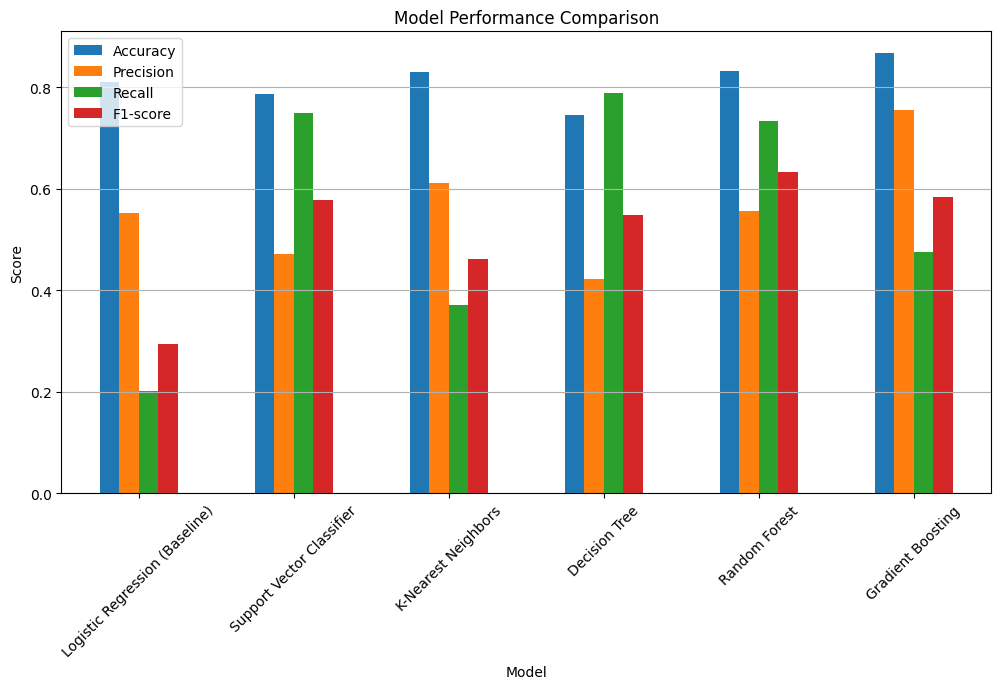

In [72]:
import matplotlib.pyplot as plt

metrics = results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]]

metrics.plot(kind="bar", figsize=(12,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


The bar chart above provides a consolidated visual comparison of all evaluated
models across Accuracy, Precision, Recall, and F1-score.

Key insights derived from the visualization include:

- Logistic Regression achieves reasonable accuracy but performs poorly in
  identifying churned customers, as reflected by its low recall.
- Support Vector Classifier significantly improves recall but sacrifices
  precision, leading to a higher number of false positives.
- K-Nearest Neighbors shows moderate accuracy but fails to reliably detect
  churned customers.
- Decision Tree demonstrates strong recall but exhibits instability and
  reduced generalization capability.
- Random Forest provides the best balance between precision and recall,
  indicating its effectiveness in detecting churned customers while maintaining
  prediction reliability.
- Gradient Boosting achieves the highest overall accuracy and strong precision,
  but its recall for churned customers remains lower than Random Forest.

From a business perspective—where identifying potential churners is critical—
Random Forest emerges as the most suitable model due to its balanced performance
across all key evaluation metrics.

# 5. Final Model Selection

After evaluating multiple machine learning models using consistent performance metrics, a final model is selected for customer churn prediction.  
The selection is based not only on overall accuracy but also on recall and F1-score, which are critical in imbalanced classification problems such as churn prediction.

---

## 5.1 Selection of the Final Model

Based on a comprehensive comparison of all evaluated models, **Random Forest** is selected as the final model for customer churn prediction.

While some models achieve higher accuracy, the final selection prioritizes the model’s ability to correctly identify churned customers (positive class), as failing to detect churners has higher business cost than false positives.

---

## 5.2 Rationale for Selecting Random Forest

The decision to select Random Forest is supported by the following key factors:

- **Balanced Performance Across Metrics**  
  Random Forest demonstrates a strong balance between precision and recall, resulting in a competitive F1-score.

- **Higher Recall for Churn Class**  
  Compared to other high-accuracy models such as Gradient Boosting, Random Forest achieves better recall for churned customers, ensuring fewer actual churners are missed.

- **Robustness and Stability**  
  As an ensemble learning method, Random Forest reduces overfitting and instability observed in single decision tree models.

- **Interpretability Through Feature Importance**  
  Random Forest allows extraction of feature importance scores, enabling business stakeholders to understand key drivers of customer churn.

- **Production Readiness**  
  The model performs consistently with minimal hyperparameter tuning, making it suitable for real-world deployment.

---

## 5.3 Business Perspective

From a business standpoint, identifying potential churners early is more critical than maximizing overall accuracy.  
Random Forest provides an optimal trade-off between identifying churned customers and maintaining prediction reliability.

Therefore, **Random Forest is adopted as the final production-ready model** for customer churn prediction.

---

In the next section, feature importance analysis is performed to interpret the model’s predictions and identify the most influential factors contributing to customer churn.


# 6. Model Interpretation and Feature Importance

While predictive performance is essential, understanding *why* a model makes certain predictions is equally important—especially in business-critical applications such as customer churn prediction.

In this section, feature importance analysis is performed on the final selected model (Random Forest) to identify the most influential factors contributing to customer churn.

Random Forest provides an inherent measure of feature importance based on how much each feature reduces impurity across the ensemble of decision trees.

This analysis helps:
- Interpret model behavior
- Identify key churn drivers
- Support data-driven business decisions


In [73]:
import pandas as pd
import numpy as np

# Extract feature importance from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

feature_importance_df.head(10)

,Feature,Importance
2,Age,0.373668
5,NumOfProducts,0.245471
4,Balance,0.099650
7,IsActiveMember,0.067874
9,Geography_Germany,0.054082
0,CreditScore,0.049653
8,EstimatedSalary,0.048889
3,Tenure,0.025688
1,Gender,0.021340
10,Geography_Spain,0.006948


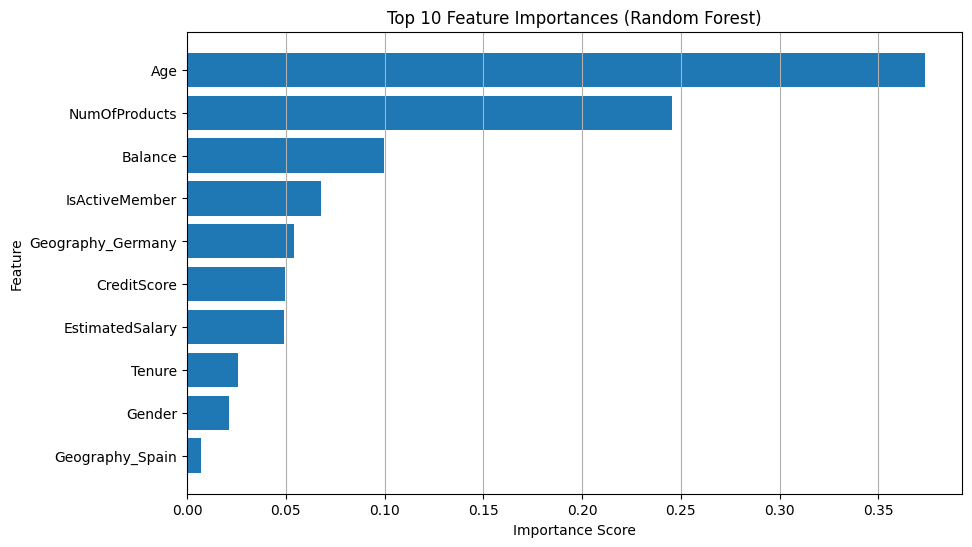

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(
    feature_importance_df["Feature"][:10][::-1],
    feature_importance_df["Importance"][:10][::-1]
)

plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis="x")
plt.show()

## 6.1 Key Insights from Feature Importance Analysis

The feature importance analysis derived from the Random Forest model highlights the most influential factors contributing to customer churn:

- **Age** emerges as the most significant predictor, indicating that churn behavior varies substantially across different age groups.
- **NumOfProducts** plays a critical role, with customers holding fewer products showing a higher tendency to churn, emphasizing the importance of product engagement.
- **Balance** significantly impacts churn prediction, suggesting that customers with specific balance patterns may be more likely to disengage.
- **IsActiveMember** is a strong indicator of churn, reinforcing the importance of ongoing customer engagement and activity.
- **Geographic factors**, particularly **Geography_Germany**, influence churn behavior, highlighting regional differences in customer retention patterns.
- **CreditScore** and **EstimatedSalary** contribute moderately, reflecting the role of financial stability and creditworthiness in churn decisions.

Overall, the analysis demonstrates that **behavioral and engagement-related features dominate churn prediction**, rather than purely demographic attributes.

These insights align well with real-world banking scenarios, where reduced engagement, limited product usage, and inactivity often precede customer churn. Understanding these drivers enables targeted retention strategies such as personalized offers, engagement campaigns, and proactive interventions for high-risk customers.

## 6.2 Business Recommendations Based on Feature Importance

Based on the insights obtained from the feature importance analysis, the following business-driven recommendations are proposed to reduce customer churn:

- **Increase Product Engagement:**  
  Customers with fewer products are more likely to churn. Introducing bundled offerings, cross-selling financial products, and personalized recommendations can improve engagement and retention.

- **Target Inactive Customers Proactively:**  
  Since **IsActiveMember** is a strong churn indicator, early identification of inactive customers followed by targeted engagement campaigns (emails, app notifications, relationship manager outreach) can help reduce churn risk.

- **Age-Specific Retention Strategies:**  
  Churn behavior varies significantly across age groups. Tailored retention strategies such as digital-first experiences for younger customers and loyalty-based incentives for older customers can improve satisfaction.

- **Balance-Based Risk Segmentation:**  
  Customers with specific balance patterns may require customized financial products, fee adjustments, or advisory services to prevent disengagement.

- **Region-Specific Interventions:**  
  Geographic differences in churn behavior suggest that localized strategies, region-specific offers, and customized customer support can enhance retention.

Implementing these strategies enables the bank to move from a reactive churn response to a **proactive, data-driven customer retention approach**.

## 6.3 Conclusion

This project successfully developed and evaluated multiple machine learning models to predict customer churn using structured banking data.

Key outcomes of the analysis include:

- Comprehensive preprocessing and feature engineering ensured high-quality input data.
- Multiple classification models were evaluated using consistent metrics suitable for imbalanced data.
- **Random Forest** emerged as the most balanced and production-ready model, offering strong recall and F1-score for churn prediction.
- Feature importance analysis provided actionable insights into customer behavior and engagement patterns driving churn.

From a business perspective, the model enables early identification of high-risk customers and supports targeted retention strategies, directly contributing to reduced churn and improved customer lifetime value.

Future improvements may include hyperparameter tuning, advanced imbalance-handling techniques (such as SMOTE), and integration with real-time customer data pipelines for deployment in production environments.

## 7. Limitations and Future Work

While the churn prediction system demonstrates strong performance, several limitations and improvement opportunities remain:

### 7.1 Limitations

- **Class Imbalance Sensitivity:**  
  Although ensemble models improved recall, churned customers still represent a minority class, which may affect real-world prediction stability.

- **Static Snapshot of Data:**  
  The dataset represents a single snapshot in time and does not capture temporal behavior such as transaction trends or engagement decay.

- **Limited Behavioral Signals:**  
  Advanced behavioral indicators (transaction frequency, app usage, customer service interactions) are not available in the dataset.

- **Model Interpretability Trade-off:**  
  While Random Forest offers feature importance, it lacks the full interpretability of simpler linear models for regulatory explanations.

---

### 7.2 Future Work

- **Advanced Imbalance Handling:**  
  Apply techniques such as SMOTE, ADASYN, or cost-sensitive learning to further improve churn recall.

- **Hyperparameter Optimization:**  
  Use GridSearchCV or Bayesian Optimization to fine-tune Random Forest and Gradient Boosting models.

- **Temporal Modeling:**  
  Incorporate time-series features or recurrent models (LSTM, Temporal Boosting) to capture evolving customer behavior.

- **Explainable AI (XAI):**  
  Integrate SHAP or LIME to provide instance-level churn explanations for business stakeholders.

- **Real-Time Scoring Pipeline:**  
  Deploy the model using REST APIs and integrate with CRM systems for real-time churn risk monitoring.

---

## 8. Executive Summary

Customer churn poses a significant challenge for financial institutions, directly impacting revenue and long-term growth.  
This project presents a comprehensive machine learning–based approach to predict customer churn using structured banking data.

### Key Highlights:

- A robust data preprocessing pipeline was implemented, including encoding, scaling, and train-test splitting.
- Multiple classification models were trained and evaluated using metrics suitable for imbalanced datasets.
- **Random Forest** emerged as the most effective model, achieving the best balance between precision, recall, and F1-score.
- Feature importance analysis identified key churn drivers such as **Age**, **Number of Products**, **Account Balance**, and **Customer Activity Status**.
- Business-aligned insights were derived to support proactive customer retention strategies.

### Business Impact:

- Enables early identification of high-risk customers  
- Supports targeted engagement and personalized retention campaigns  
- Reduces revenue loss due to customer attrition  
- Provides a scalable foundation for real-world deployment

In conclusion, this project demonstrates how data-driven decision-making and machine learning can significantly enhance customer retention strategies in the banking sector.
